In [22]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
from scipy.spatial.distance import pdist
import scipy.sparse.linalg
import pandas as pd
%matplotlib inline

class kPCA():
    def __init__(self, K):
        # ...
        self.K = K
        self.n = len(K)
        D, U = np.linalg.eigh(K)
        #idx = np.argsort(-D)
        Ut = U.T
        self.U = Ut#[idx]
        self.D = D#[idx]
        



## 4.1 Kernel PCA: Toy Data (10 points)

(a) Create a toy dataset of 2-dimensional data points x(α) = (x( 1α), x( 2α)), α = 1,...,90. The points represent iid samples of 30 points from 3 different distributions with uncorrelated, normally distributed (sd=0.1) coordinate values differing only in their mean value. The first sample (α = 1,...,30) should be centered on hx(α)i1 = (−0.5,−0.2), the second (α = 31,...,60) on hx(α)i2 = (0, 0.6), and the third (α = 61,...,90) on hx(α)i3 = (0.5, 0).

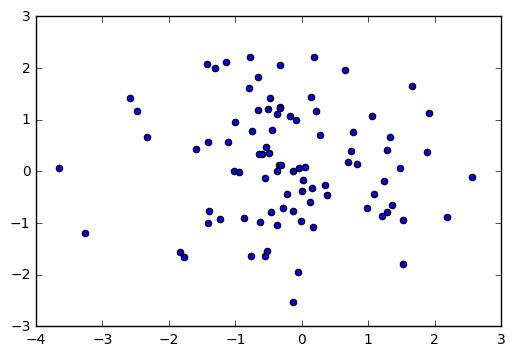

In [30]:

fst=np.random.randn(30,2)+np.array([-0.5,-0.2])
snd=np.random.randn(30,2)+np.array([0.,0.6])
thd=np.random.randn(30,2)+np.array([0.5,0.])
training_data= np.append(np.append(fst,snd,0),thd,0)
plt.scatter(training_data[:,0],training_data[:,1])

b) Apply a Kernel PCA using the RBF kernel (see below) with a suitable parameter value
for the width σ of the kernel and calculate the coefficients for the representation of the
eigenvectors (PCs) in the space spanned by the transformed data points.

RBF Kernel:

$$ k(x^{(\alpha)},x^{(\beta)})) = \exp\left(-\frac{||x^{(\alpha)}-x^{(\beta)}||^2}{2 \sigma^2} \right) $$

In [62]:
n = 90
sigma = 1
X1 = (training_data**2).sum(1) + np.zeros([n,1])
D1 = X1 - 2*(training_data.dot(training_data.T)) + X1.T
K = np.exp(D1/(2*sigma**2))
# kernel centlies
rowave = K.mean(0).reshape(1,n)
colave = K.mean(1).reshape(n,1)
matave = K.mean()*np.ones((n,n))
K= K - rowave - colave + matave
kpca = kPCA(K)
kpca.U.shape
# A is the the coefficients for the representation of the
# eigenvectors (PCs) in the space spanned by the transformed data points.
A =kpca.U.T
normA =kpca.U/np.sqrt(np.abs(kpca.D)).reshape(n,1)
normA = normA/np.sqrt(n)
normA = normA.T
print( normA.shape)

(90, 90)


(c) Visualize the first 8 PCs in the 2-dimensional input space in the following way: 

In [32]:
# Projection onto first 8 eigen vectors
U = np.dot(K,A[:,:8])
normU = np.dot(K,normA[:,:8])
print(normU.shape)

(90, 8)


In [74]:
x = np.linspace(-4.,4,90)
y = np.linspace(-4.,4,90)
X, Y = np.meshgrid(x, y)

grid_points = len(X)
XY = np.append(X.reshape(n,n,1),Y.reshape(n,n,1),2)
XY=XY.reshape(n*n,2)
#KK=np.empty((n*n,n))

X2 = (training_data**2).sum(1).reshape(n,1)*np.ones((n,n*n))
U2 = (XY**2).sum(1).reshape(1,n*n) * np.ones([n,n*n])
D = X2 - 2*(training_data.dot(XY.T)) + U2
KK = np.exp(D.T/(2*sigma**2))
Z=KK.dot(normA[:,:8]).reshape(n,n,8)

In [75]:
Z.shape

(90, 90, 8)

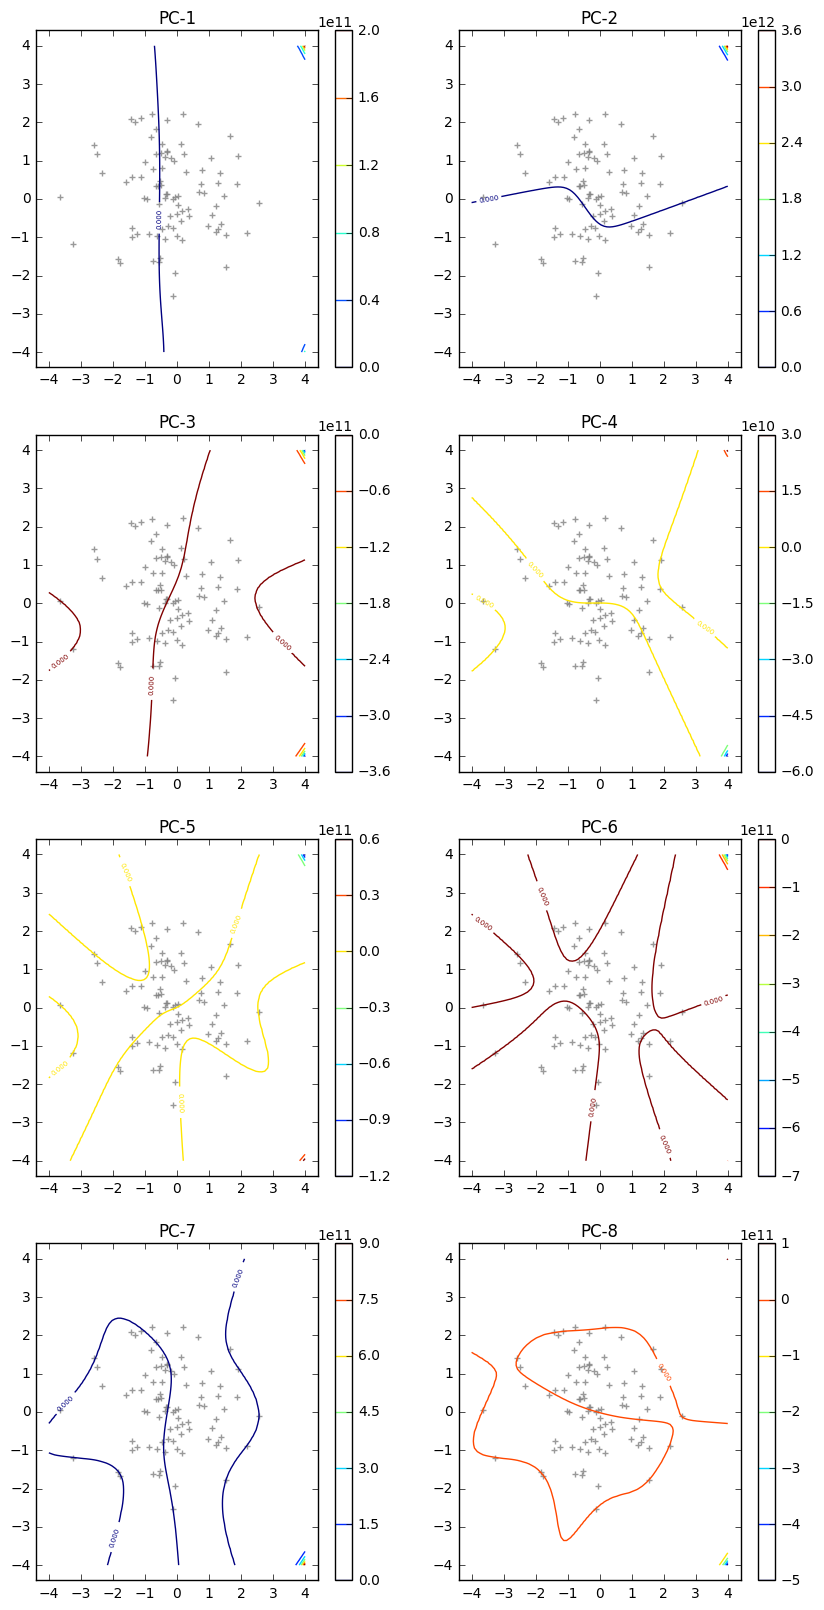

In [76]:


plt.figure(figsize=(10,20))
for i in range(8):
    plt.subplot(4,2,i+1)
#     plt.imshow(Z, extent=[-grid_space, grid_space, -grid_space, grid_space])
    ct = plt.contour(X,Y,Z[:,:,i])
    plt.clabel(ct, inline=1, fontsize=5)
    plt.colorbar()
    plt.title("PC-%d" % (i+1))
    plt.scatter(training_data[:,0], training_data[:,1], color='grey', marker='+', alpha=0.8)

